In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


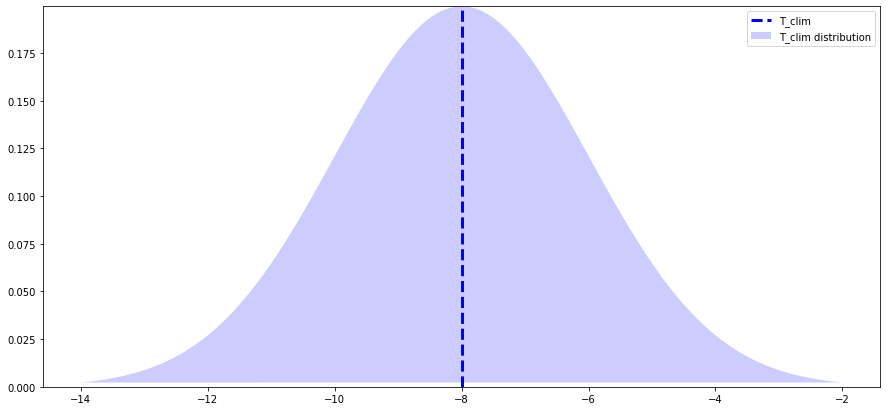

In [2]:
"""
Set climatological data
"""
T_clim = -8
sigma_clim = 2.

#plot climatologial data...
x = np.arange(T_clim-sigma_clim*3,T_clim+sigma_clim*3,0.01)
clim_gauss = 1./np.sqrt(2.*np.pi * sigma_clim**2)*np.exp(-(x-T_clim)**2/(2.*sigma_clim**2))
fig,ax = plt.subplots(1,1,figsize = (15,7))
ax.set_ylim(0,clim_gauss.max())
ax.fill(x,clim_gauss,'b',alpha=0.2,label='T_clim distribution')
ax.axvline(T_clim, color='b', linestyle = '--', linewidth=3,label='T_clim')
ax.legend()

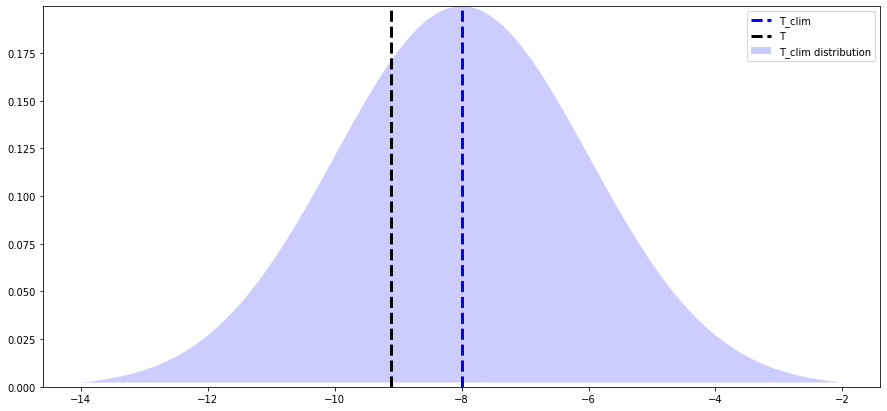

In [3]:
"""
Set truth by randomly drawing from climatology (we assume nature behaves this way)
"""
T = np.random.normal(T_clim,sigma_clim) 

#add truth to the plot...
ax.axvline(T, color='k', linestyle = '--', linewidth=3,label='T')
ax.legend()
fig

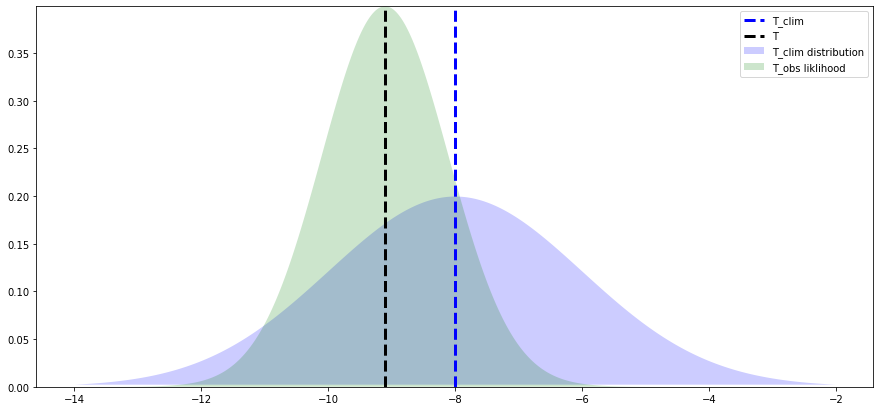

In [4]:
"""
Set the observation error 
"""
sigma_obs = 1.

#plot the observation likelihood
obs_gauss = 1./np.sqrt(2.*np.pi * sigma_obs**2)*np.exp(-(x-T)**2/(2.*sigma_obs**2))
ax.fill(x,obs_gauss,'g',alpha=0.2,label='T_obs liklihood')
ax.set_ylim(0,max(clim_gauss.max(),obs_gauss.max()) )
ax.legend()
fig

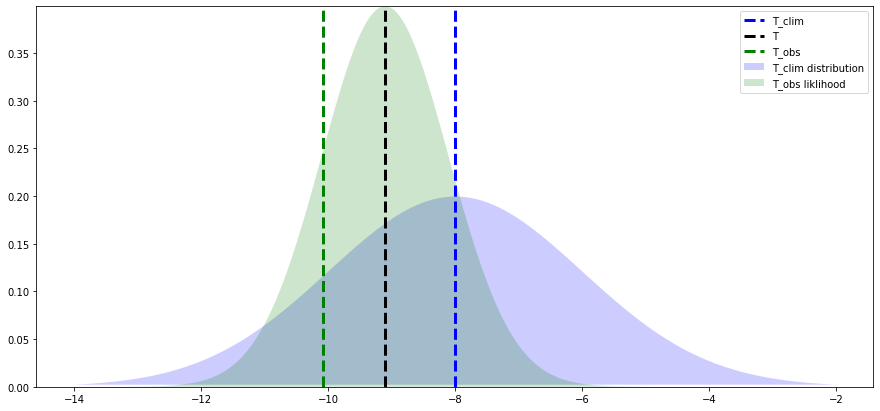

In [5]:
"""
Generate an observation (We can pretend this is provided by a thermometer)
"""
T_obs = np.random.normal(T,sigma_obs)

#plot observation...
ax.axvline(T_obs, color='g', linestyle = '--', linewidth=3,label='T_obs')
ax.legend()
fig

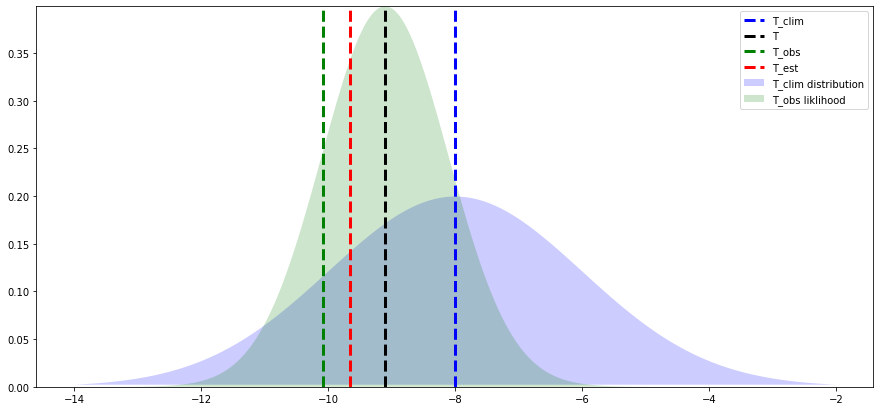

In [6]:
"""
compute weights and get the estimate of the true temperature
"""
w = sigma_clim**2/(sigma_clim**2+sigma_obs**2)
T_est = w*T_obs+(1-w)*T_clim

#plot the estimate
ax.axvline(T_est, color='r', linestyle = '--', linewidth=3,label='T_est')
ax.legend()
fig


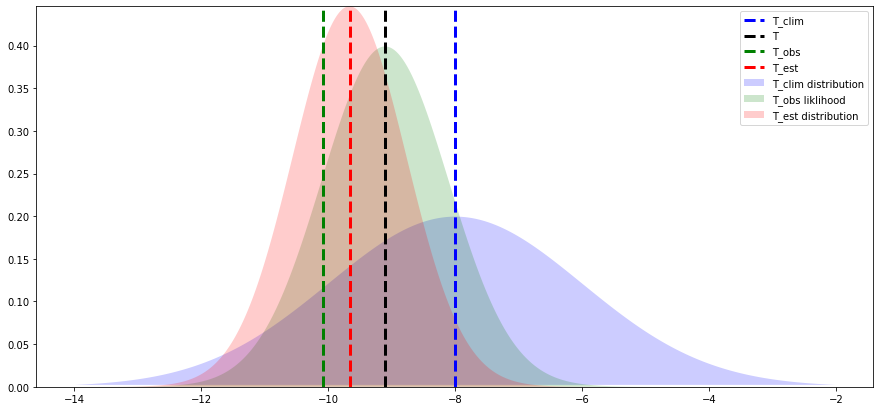

In [7]:
"""
Compute the error variance of the estimate
"""
sigma_est = w**2*sigma_obs**2 +(1-w)**2*sigma_clim**2

#plot the distribution of the estimate...
est_gauss = 1./np.sqrt(2.*np.pi * sigma_est)*np.exp(-(x-T_est)**2/(2.*sigma_est))
ax.fill(x,est_gauss,'r',alpha=0.2,label='T_est distribution')
ax.set_ylim(0,est_gauss.max())
ax.legend()
fig